In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##IMPORTING LIBRARY

In [99]:
import pandas as pd  #for create and read the data
import numpy as np   # for mathematics calculations
import matplotlib.pyplot as plt                                 #for visualization
import seaborn as sns                                           # for visualization
sns.set(style="white")                                          #white background style for seaborn plots
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #for normalization of data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings('ignore')


In [3]:
house_data=pd.read_csv("/content/drive/MyDrive/ML/PROJECT/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
house_data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [98]:
#checking the null values
house_data.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
roof_encoder      0
Grade_encoder     0
dtype: int64

There are no missing values in the dataset

##EDA

In [4]:
def bar_percentage(ax, count="number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    return(plt.show())

##UNIVARIATE ANALYSIS

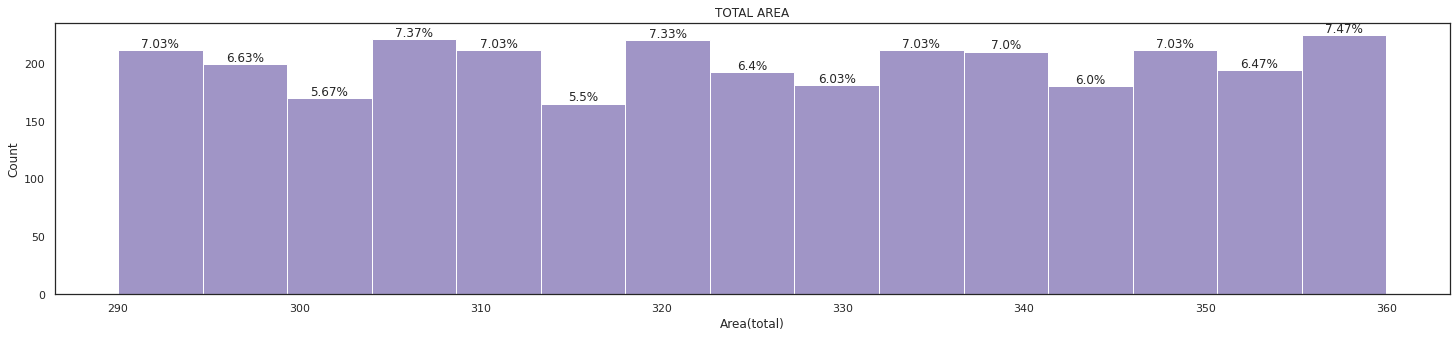

In [5]:
plt.figure(figsize=(25,5))
a=sns.histplot(house_data["Area(total)"],color="m")
plt.title("TOTAL AREA")
bar_percentage(a,len(house_data))

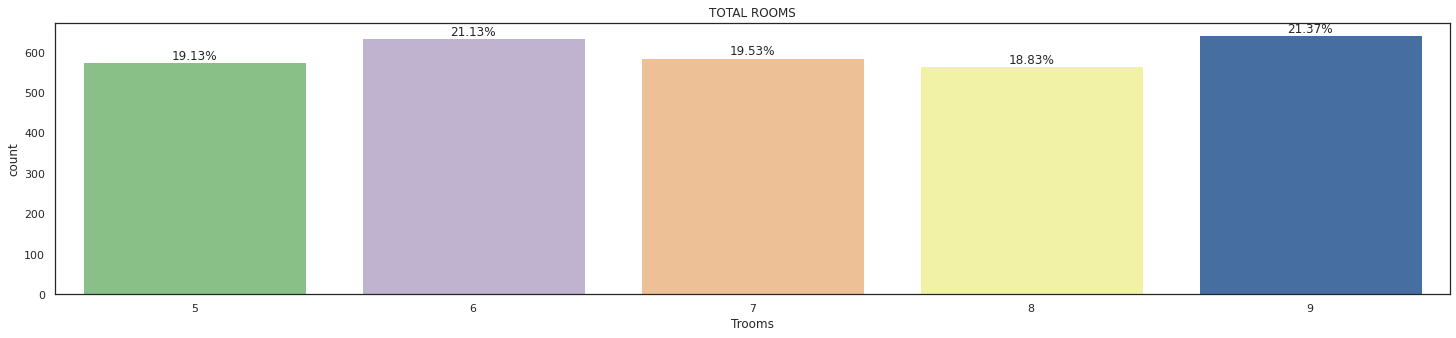

In [6]:
plt.figure(figsize=(25,5))
b=sns.countplot(house_data["Trooms"],palette="Accent")
plt.title("TOTAL ROOMS")
bar_percentage(b,len(house_data))

The most of the houses having  9-6 rooms
 

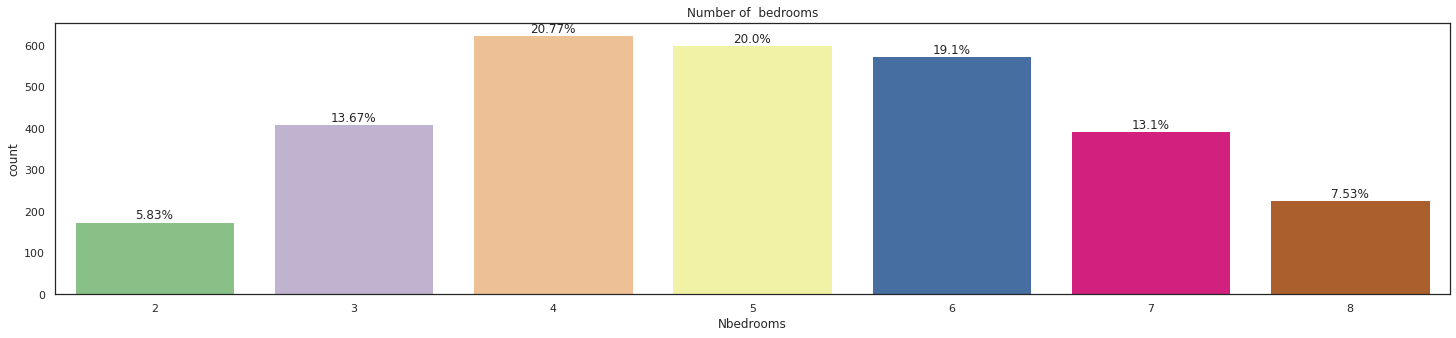

In [7]:
plt.figure(figsize=(25,5))
c=sns.countplot(house_data["Nbedrooms"],palette="Accent")
plt.title("Number of  bedrooms")
bar_percentage(c,len(house_data))

The maximum numbers of bed rooms in houses is 4 - 5 

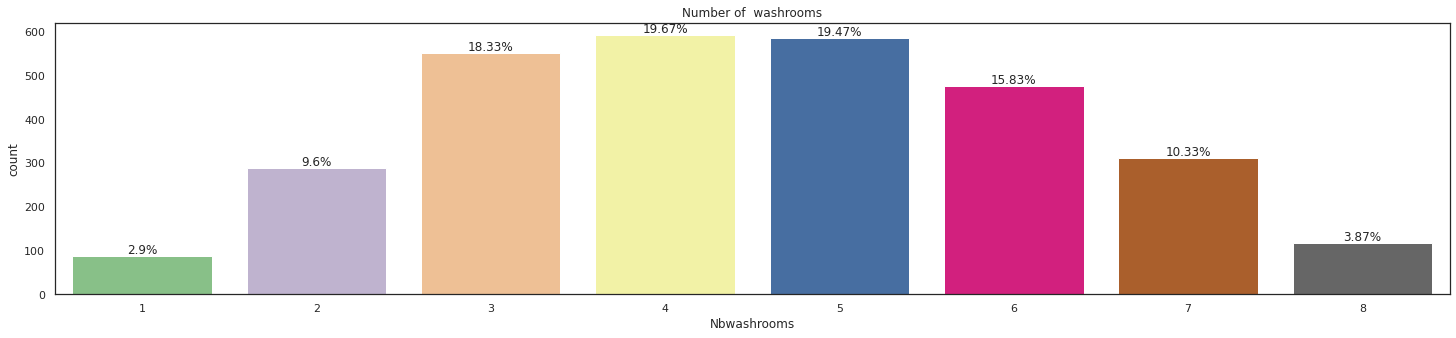

In [8]:
plt.figure(figsize=(25,5))
d=sns.countplot(house_data["Nbwashrooms"],palette="Accent")
plt.title("Number of  washrooms")
bar_percentage(d,len(house_data))

The maximum numbers of attached washrooms with bedrooms in houses is 4 - 5

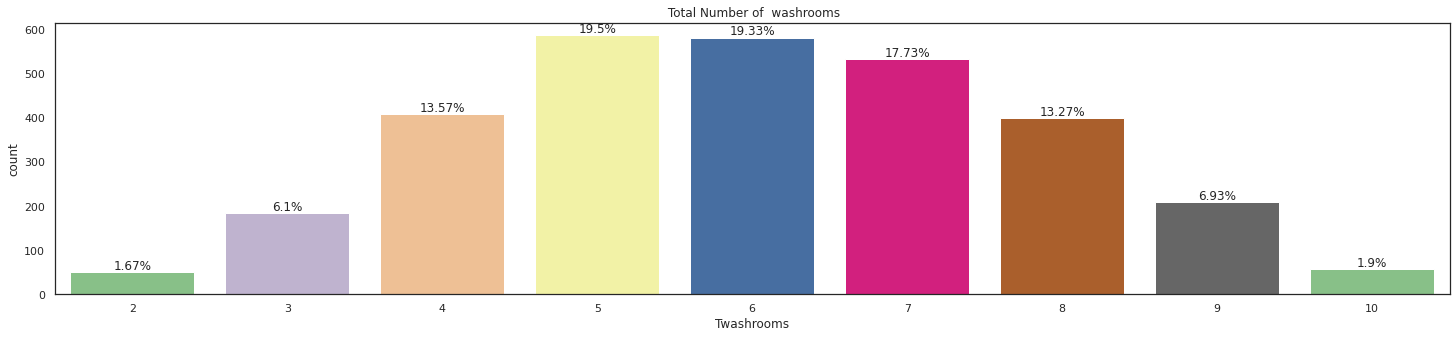

In [9]:
plt.figure(figsize=(25,5))
e=sns.countplot(house_data["Twashrooms"],palette="Accent")
plt.title(" Total Number of  washrooms")
bar_percentage(e,len(house_data))

The Most of houses having 5-7 washrooms in their houses

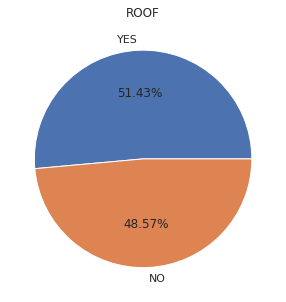

In [10]:
fig,ax=plt.subplots(figsize=(25,5))
percentage = house_data["roof"].value_counts()  
labels = list(house_data["roof"].value_counts().index) # Converting the index of value counts into list
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")# autopct: to print the percentage on pie wedge. 2 decimal points used
plt.title("ROOF")
plt.show()

There is 51% of houses with roof and remaning 49% of houses without roof.

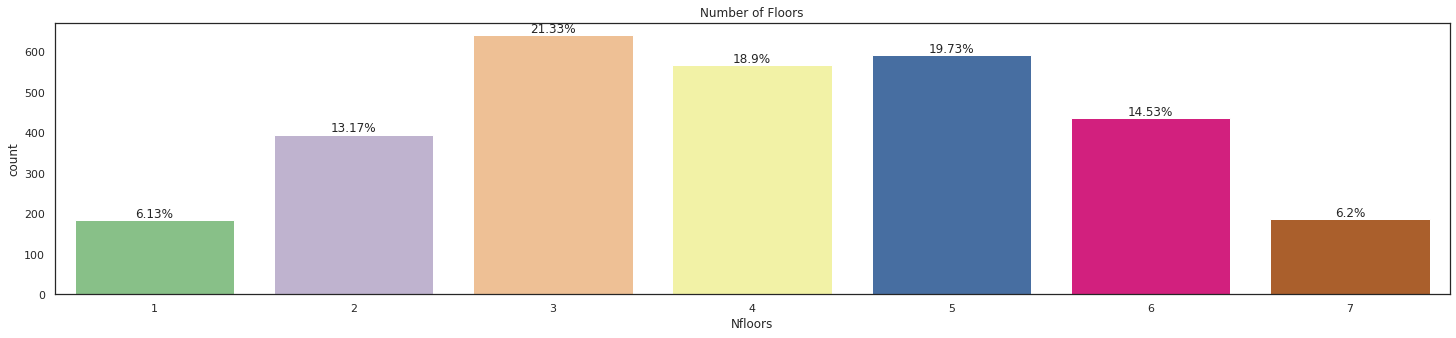

In [11]:
plt.figure(figsize=(25,5))
g=sns.countplot(house_data["Nfloors"],palette="Accent")
plt.title("Number of Floors")
bar_percentage(g,len(house_data))

The most of the houses having with 3-5 floors and minimum single floor


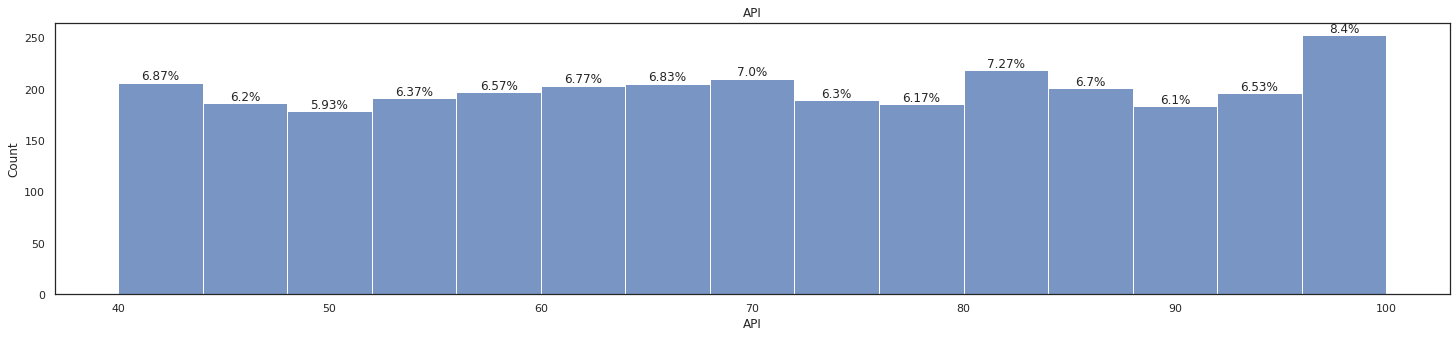

In [12]:

plt.figure(figsize=(25,5))
h=sns.histplot(house_data["API"])
plt.title("API")
bar_percentage(h,len(house_data))

The API 40-70 is good and 70-100 is moderate 

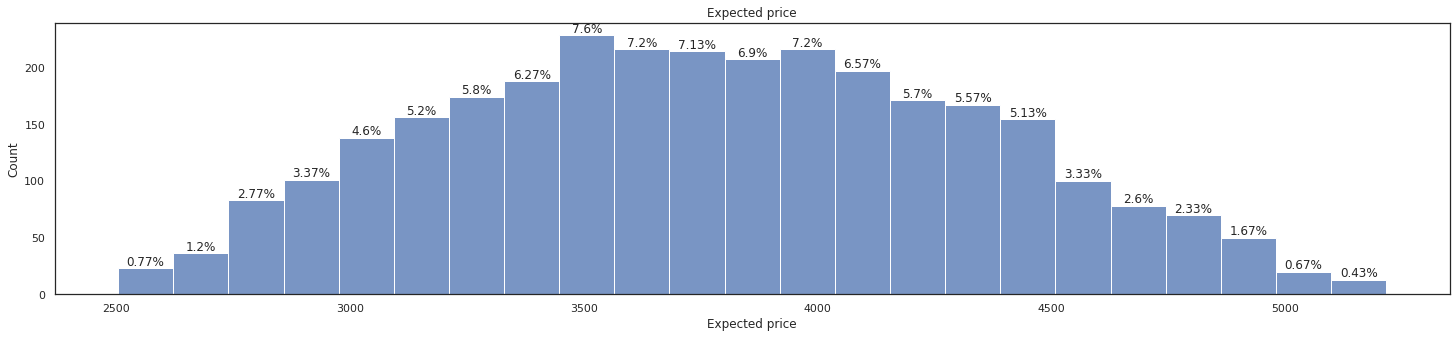

In [13]:
plt.figure(figsize=(25,5))
i=sns.histplot(house_data["Expected price"])
plt.title("Expected price")
bar_percentage(i,len(house_data))

The maximum number of the customers expected of the house price between 3500-4000

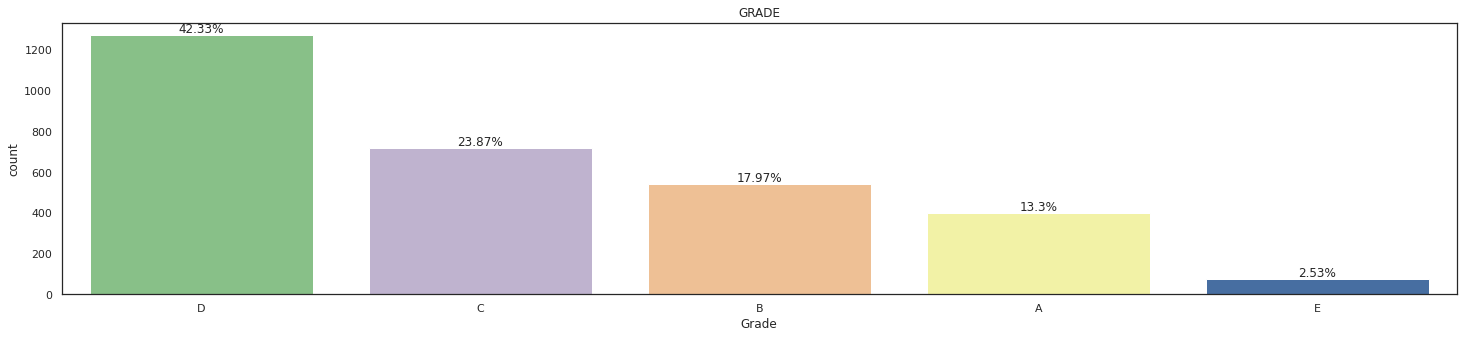

In [14]:
plt.figure(figsize=(25,5))
J=sns.countplot(house_data["Grade"],palette="Accent")
plt.title("GRADE")
bar_percentage(J,len(house_data))

The most of the  Houses are in D-Grade and minimum number of the houses are in E-Grade 

##BIVARIATE ANALYSIS

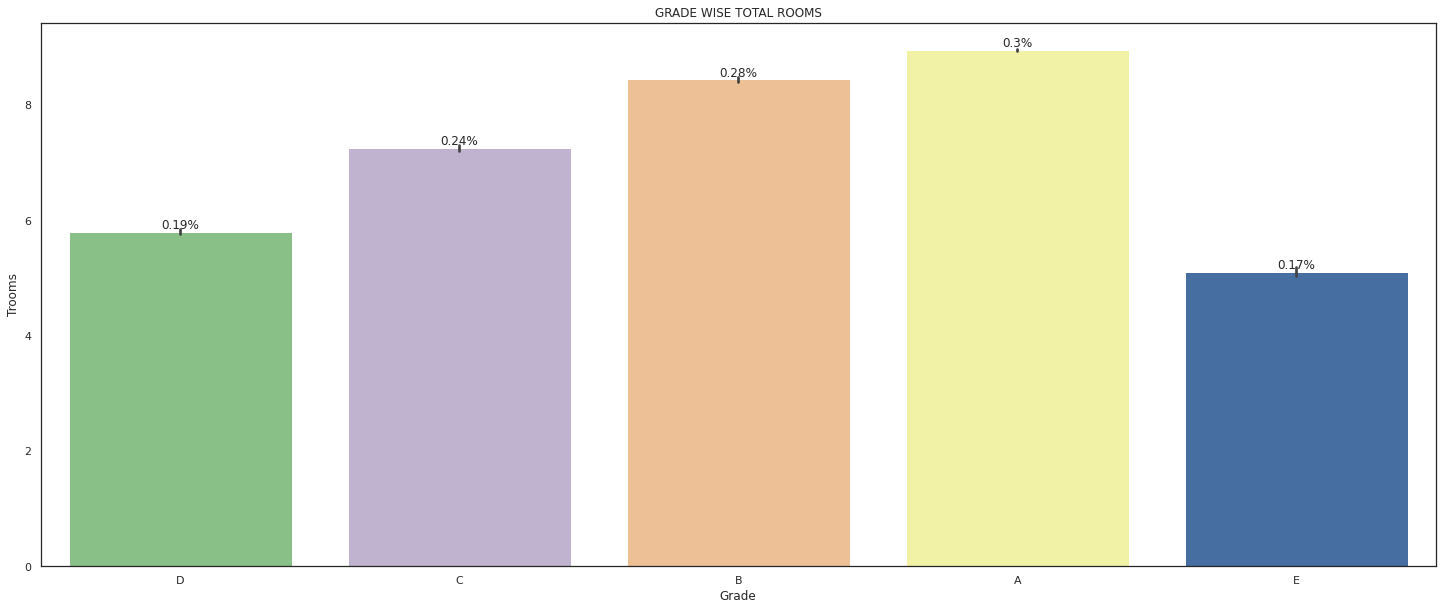

In [15]:
fig,ax=plt.subplots(figsize=(25,10))
A=sns.barplot(x="Grade",y="Trooms",data=house_data,palette="Accent")
plt.title("GRADE WISE TOTAL ROOMS")
bar_percentage(A,len(house_data))
plt.show()

The most of the houses are in A-Grade and also having maximum number of rooms

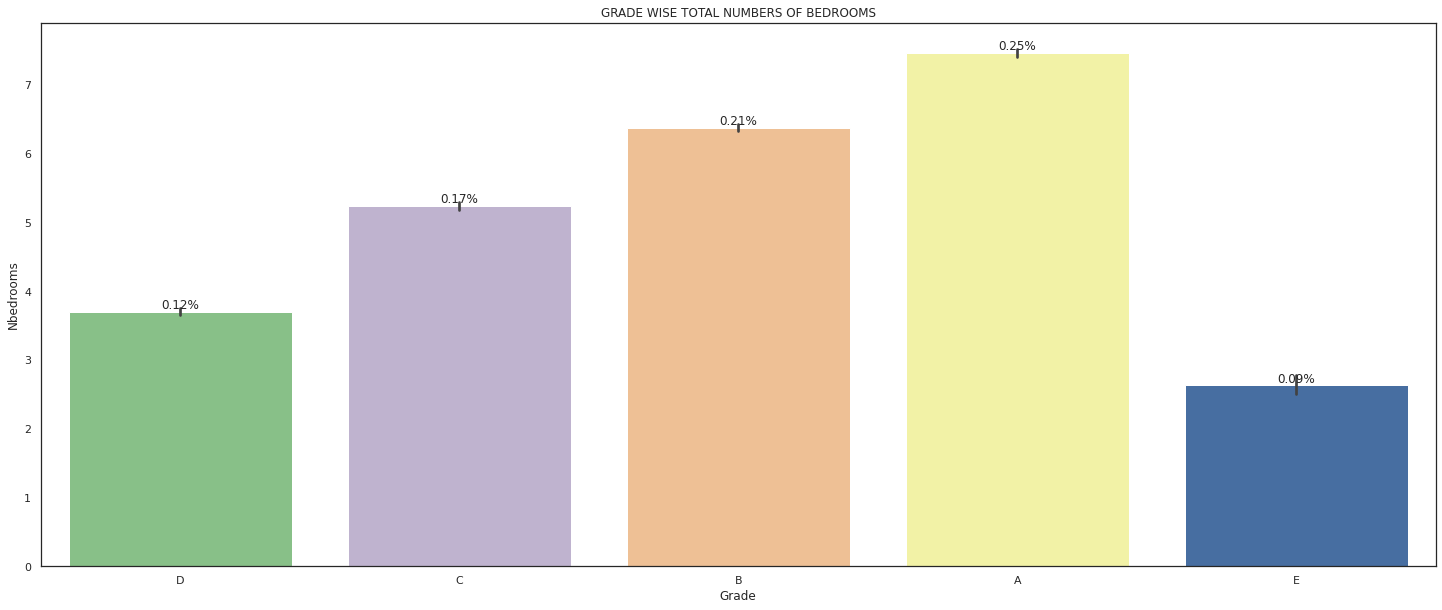

In [16]:
fig,ax=plt.subplots(figsize=(25,10))
B=sns.barplot(x="Grade",y="Nbedrooms",data=house_data,palette="Accent")
plt.title("GRADE WISE TOTAL NUMBERS OF BEDROOMS")
bar_percentage(B,len(house_data))
plt.show()

The most of the houses are in A-Grade and also having maximum number of bedrooms

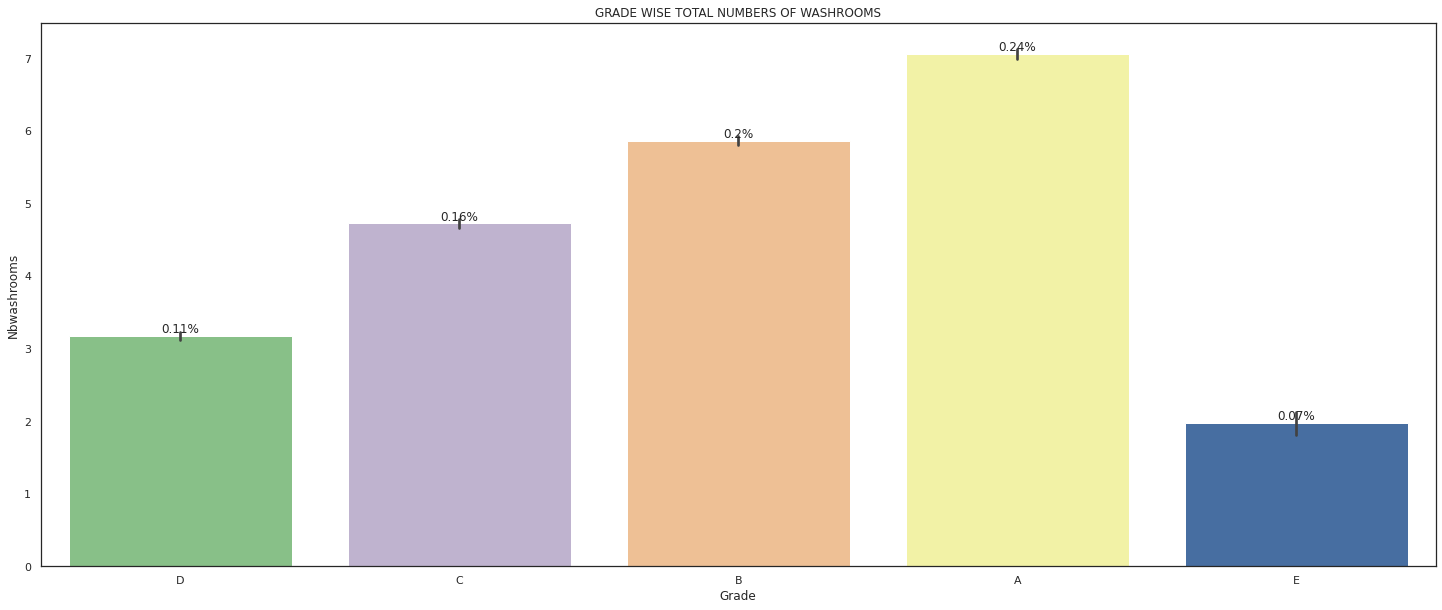

In [17]:
fig,ax=plt.subplots(figsize=(25,10))
C=sns.barplot(x="Grade",y="Nbwashrooms",data=house_data,palette="Accent")
plt.title("GRADE WISE TOTAL NUMBERS OF WASHROOMS")
bar_percentage(C,len(house_data))
plt.show()

The most of the houses are in A-Grade and also having maximum number of washrooms

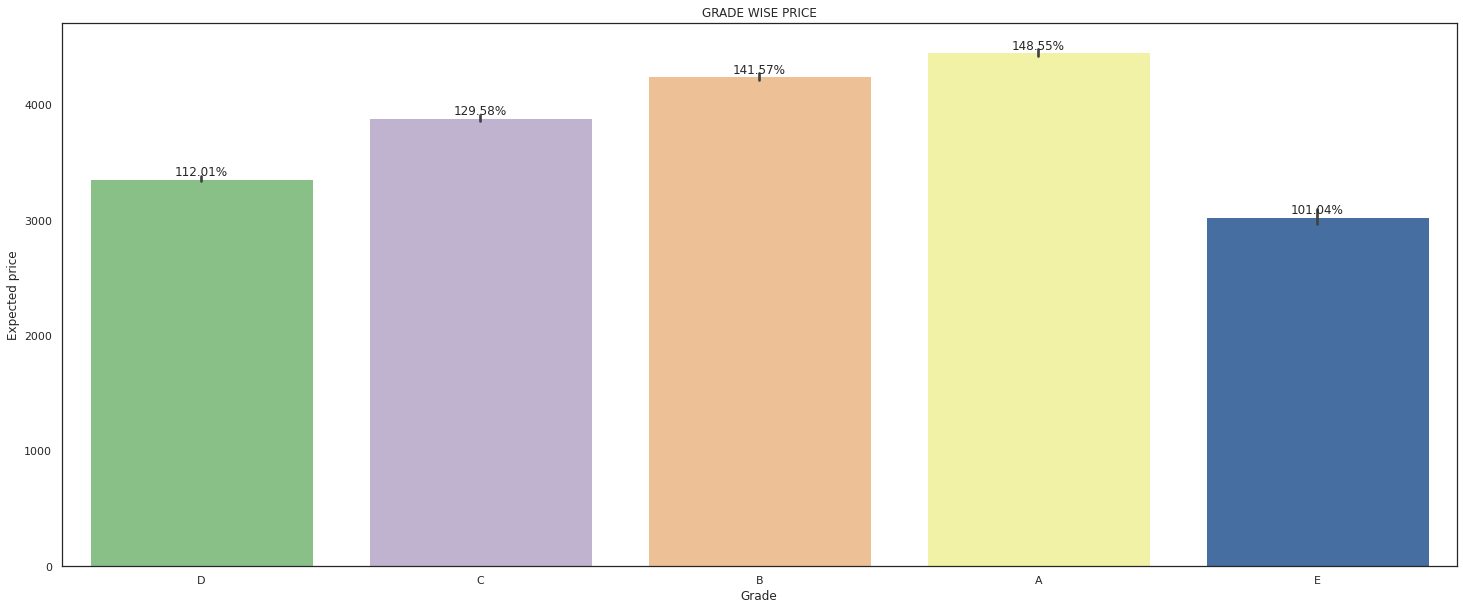

In [18]:
fig,ax=plt.subplots(figsize=(25,10))
D=sns.barplot(x="Grade",y="Expected price",data=house_data,palette="Accent")
plt.title("GRADE WISE PRICE")
bar_percentage(D,len(house_data))
plt.show()

The price of the houses are in A-grade are high and minimum price of the houses are in E-Grade

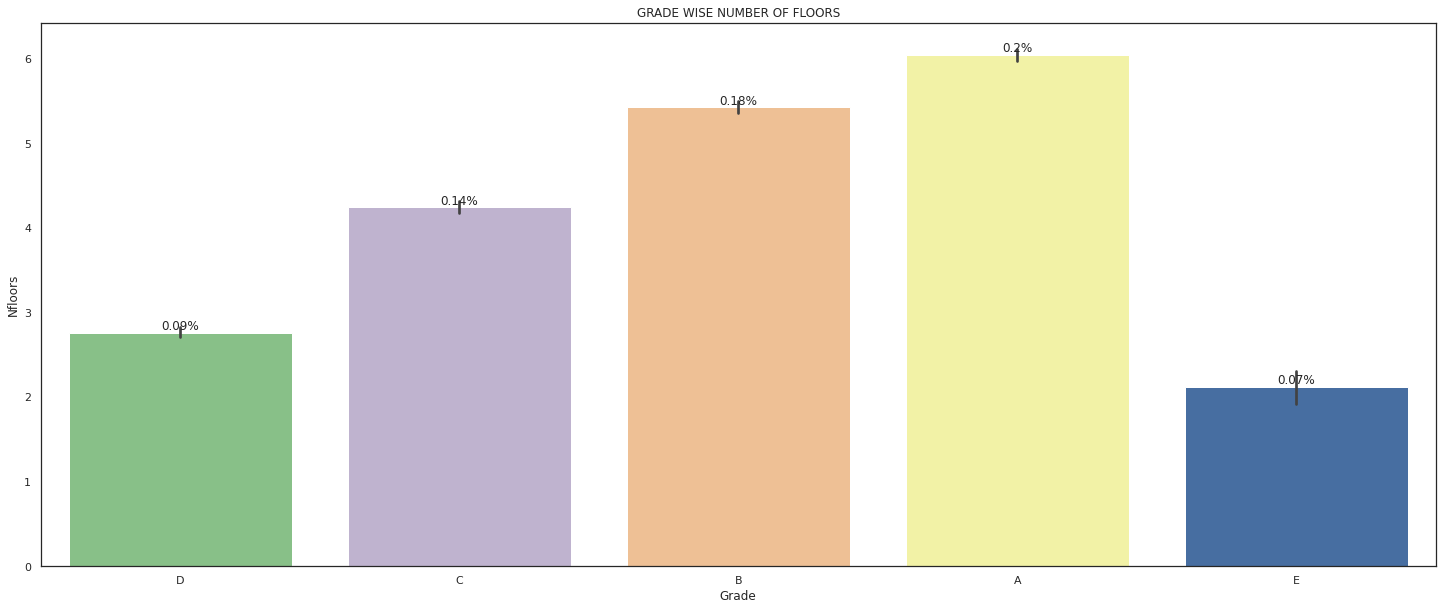

In [19]:
fig,ax=plt.subplots(figsize=(25,10))
E=sns.barplot(x="Grade",y="Nfloors",data=house_data,palette="Accent")
plt.title("GRADE WISE NUMBER OF FLOORS")
bar_percentage(E,len(house_data))
plt.show()

The most of the houses are in A-Grade and also having maximum number of floors

##MULTIVARIATE ANALYSIS

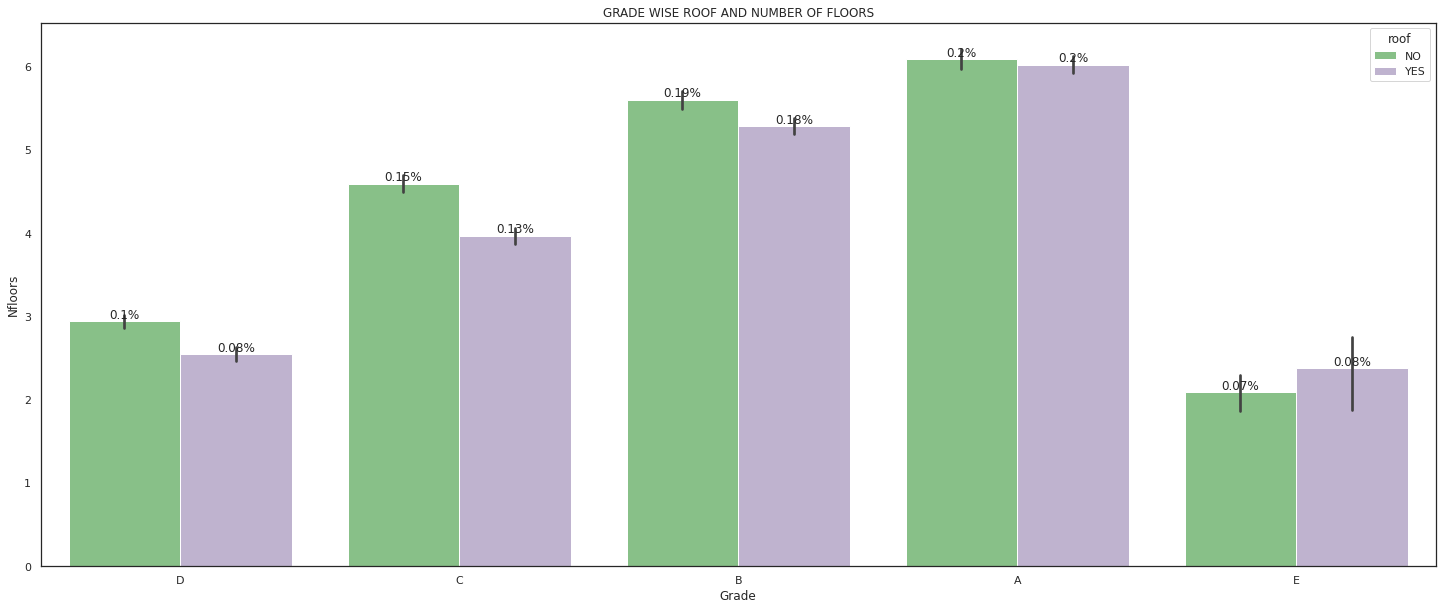

In [20]:
fig,ax=plt.subplots(figsize=(25,10))
F=sns.barplot(x="Grade",hue='roof',y="Nfloors",data=house_data,palette="Accent")
plt.title("GRADE WISE ROOF AND NUMBER OF FLOORS")
bar_percentage(F,len(house_data))
plt.show()

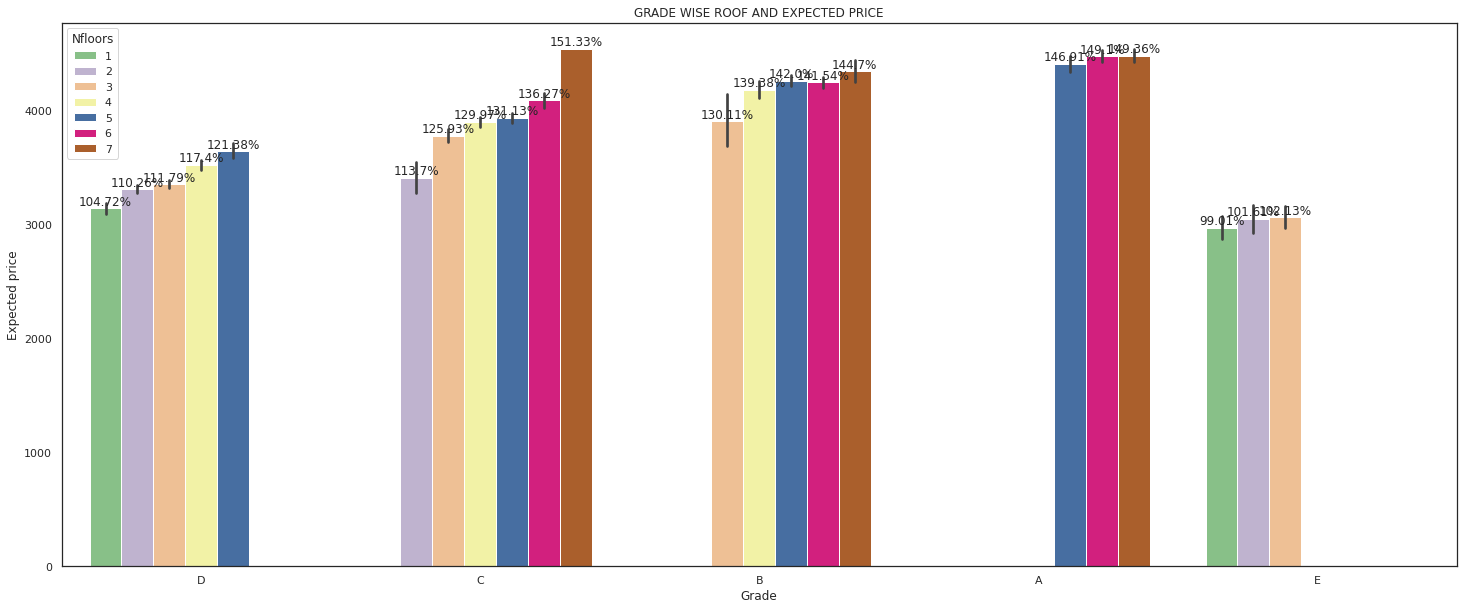

In [21]:
fig,ax=plt.subplots(figsize=(25,10))
I=sns.barplot(x="Grade",hue='Nfloors',y="Expected price",data=house_data,palette="Accent")
plt.title("GRADE WISE ROOF AND EXPECTED PRICE")
bar_percentage(I,len(house_data))
plt.show()

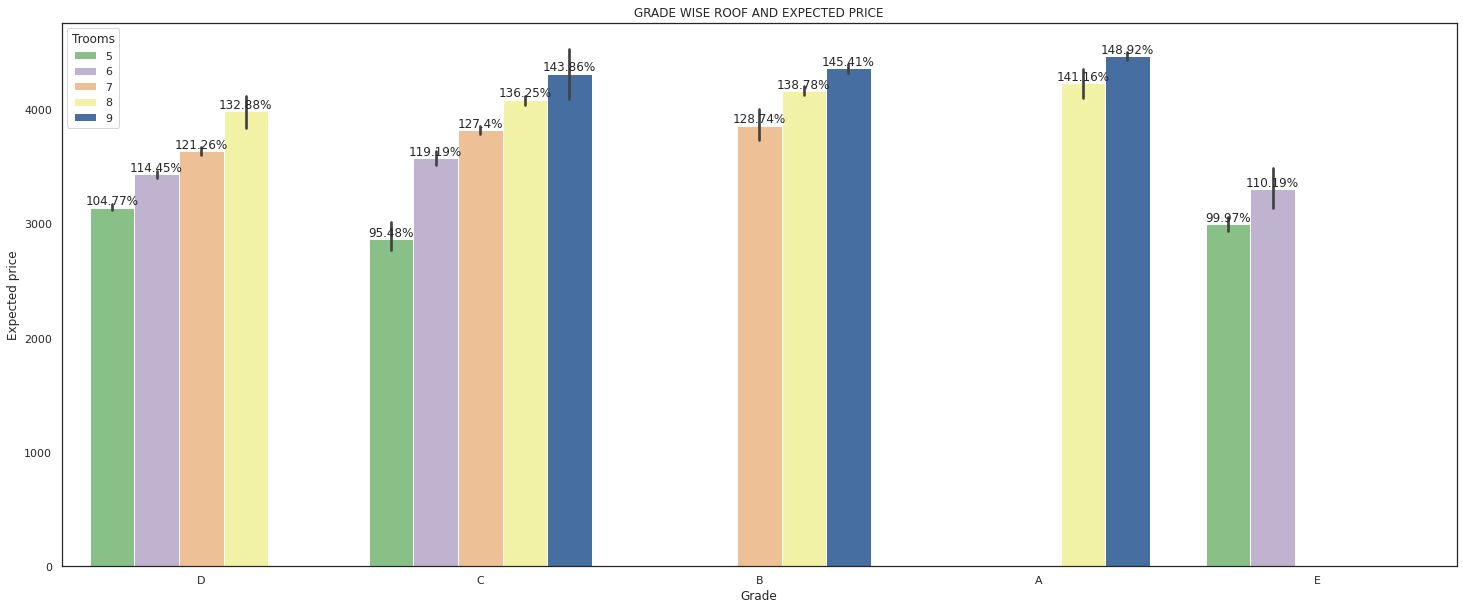

In [22]:
fig,ax=plt.subplots(figsize=(25,10))
I=sns.barplot(x="Grade",hue='Trooms',y="Expected price",data=house_data,palette="Accent")
plt.title("GRADE WISE ROOF AND EXPECTED PRICE")
bar_percentage(I,len(house_data))
plt.show()

In C-Grade houses having the more variety of rooms and D-grade houses are also having more varitey



*   There are 51% of houses with roof and remaning 49% of houses without roof are in the sales

*   The sales houses are separeted into 5 category A-Grade is the best category of house and E-Grade houses are wrost 
*   There are 13% of the houses in A-Grade and 18% of the Houses are in B-Grade 
and then  are 24% of the Houses in C-Grade and  42% of the houses are in D-Grade Then 3% of the Houses are in E-Grade



* In C-Grade houses having the more types of rooms,and more types of floors and price is good 







##DATA PREPROCESSING

In [23]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [24]:
lst=[]
for i in house_data.columns:
  if house_data[i].dtypes==object:
    lst.append(i)
    #converting object into category
for i in lst:
  house_data[i]=house_data[i].astype("category")
 #label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder() 
for i in lst:
  house_data[i+"_encoder"]=label_encoder.fit_transform(house_data[i])
house_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              3000 non-null   int64   
 1   Area(total)     3000 non-null   int64   
 2   Trooms          3000 non-null   int64   
 3   Nbedrooms       3000 non-null   int64   
 4   Nbwashrooms     3000 non-null   int64   
 5   Twashrooms      3000 non-null   int64   
 6   roof            3000 non-null   category
 7   Roof(Area)      3000 non-null   int64   
 8   Lawn(Area)      3000 non-null   int64   
 9   Nfloors         3000 non-null   int64   
 10  API             3000 non-null   int64   
 11  ANB             3000 non-null   int64   
 12  Expected price  3000 non-null   int64   
 13  Grade           3000 non-null   category
 14  roof_encoder    3000 non-null   int64   
 15  Grade_encoder   3000 non-null   int64   
dtypes: category(2), int64(14)
memory usage: 334.4 KB


In [25]:
house_data1=house_data.drop(columns="Grade_encoder")
house_data1

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encoder
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B,1
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A,1
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D,0
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B,0


In [26]:
def feature_scale(scale):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  new_df=house_data1.select_dtypes(include=numerics)
  if scale=="minmax":
    scaler=MinMaxScaler()
  else:
    scaler=StandardScaler()
  df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
  return(df_scaled)

In [27]:
scale="minmax"
scaled_data=feature_scale(scale)
scaled_data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoder
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.0
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1.0
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1.0
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1.0
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330,1.0
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546,1.0
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.0
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.0


In [28]:
house_target=house_data. Grade_encoder


In [29]:
house_scaled=pd.concat([scaled_data,house_target],axis=1)
house_scaled

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoder,Grade_encoder
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.0,3
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1.0,3
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1.0,2
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1.0,3
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330,1.0,1
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546,1.0,0
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.0,3
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.0,1


In [30]:
#Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=house_scaled.corr()
corr.style.background_gradient(cmap='Accent')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoder,Grade_encoder
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,0.011059,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000


In [31]:
new_house_data=house_scaled.drop(columns="Id")
new_house_data

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoder,Grade_encoder
0,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.0,3
1,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1.0,3
2,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1.0,2
3,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1.0,3
4,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330,1.0,1
2996,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546,1.0,0
2997,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.0,3
2998,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.0,1


##Creating test and training datasets

In [32]:
X = new_house_data.drop(columns='Grade_encoder',axis=1)
Y = new_house_data['Grade_encoder']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
X_train.shape, Y_train.shape, X_test.shape

((2400, 12), (2400,), (600, 12))

##LOGISTIC REGRESSION

In [33]:
# Logistic Regression - training the model
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred_LR = logreg.predict(X_test)

In [34]:
Accuracy_LR=logreg.score(X_test,Y_test)
print("ACCURACY OF THE TEST DATA SET",Accuracy_LR)

ACCURACY OF THE TEST DATA SET 0.9266666666666666


In [35]:
from sklearn.metrics import confusion_matrix


In [36]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(Y_test, Y_pred_LR)

In [37]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])

In [38]:
cm_df

,A,B,C,D,E
A,66,2,0,0,0
B,3,107,9,0,0
C,0,3,131,8,0
D,0,0,7,250,0
E,0,0,0,12,2


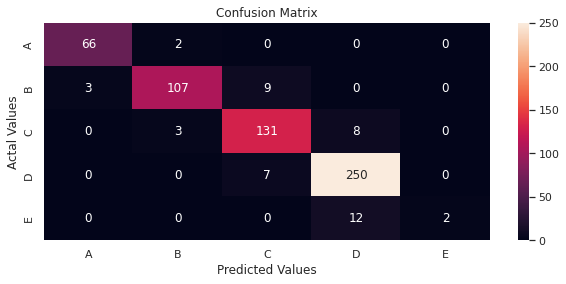

In [39]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [103]:
a=print(classification_report(Y_test,Y_pred_LR,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.96      0.97      0.96        68
           B       0.96      0.90      0.93       119
           C       0.89      0.92      0.91       142
           D       0.93      0.97      0.95       257
           E       1.00      0.14      0.25        14

    accuracy                           0.93       600
   macro avg       0.95      0.78      0.80       600
weighted avg       0.93      0.93      0.92       600



##EVALUATION METRICES

Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.
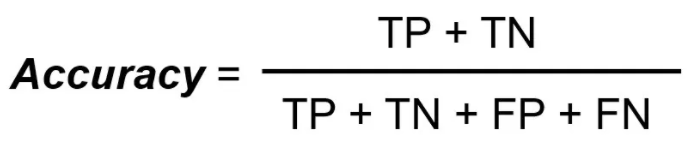

*    Precision —Precision explains how many of the correctly predicted cases actually turned out to be positive.

*   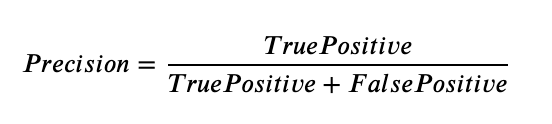

*  Recall explains how many of the actual positive cases we were able to predict correctly with our model
*   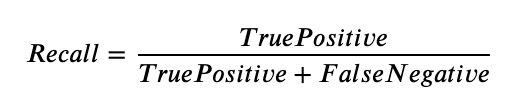

*   F1 Score — It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.
*   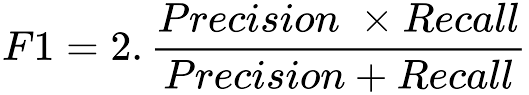







In [40]:
Accuracy_LR=accuracy_score(Y_test,Y_pred_LR)
Recall_LR= recall_score(Y_test, Y_pred_LR,average='weighted')
F1_LR=f1_score(Y_test, Y_pred_LR,average='weighted')
Pression_LR=precision_score(Y_test, Y_pred_LR,average='weighted')
print("ACCURACY SCORE",Accuracy_LR,"\n","RECALL SCORE",Recall_LR,"\n","F1 SCORE",F1_LR,"\n","PRECISION SCORE",Pression_LR)

ACCURACY SCORE 0.9266666666666666 
 RECALL SCORE 0.9266666666666666 
 F1 SCORE 0.9197120891820775 
 PRECISION SCORE 0.9287302648515123


##DECISION TREE

In [41]:
# Finding the best hyperparameters for decision tree 

DT = DecisionTreeClassifier()

params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,5,10,20,30,40,60,80,100]
}

grid= GridSearchCV(estimator=DT,
                           param_grid=params,
                           cv = 10,
                           verbose=1,scoring="accuracy")

# Training the grid
grid.fit(X_train,Y_train)

# Getting the best hyperparameters
best_grid = grid.best_estimator_
best_grid

Fitting 10 folds for each of 90 candidates, totalling 900 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5)

In [42]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=5).fit(X_train,Y_train)
# Predicting using new dt
dt_pred =dt.predict(X_test)


In [43]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_dt = confusion_matrix(Y_test, dt_pred)

In [44]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_DT = pd.DataFrame(cm_dt,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])

In [45]:
cm_DT

,A,B,C,D,E
A,63,5,0,0,0
B,14,89,16,0,0
C,0,6,121,15,0
D,0,0,21,233,3
E,0,0,0,8,6


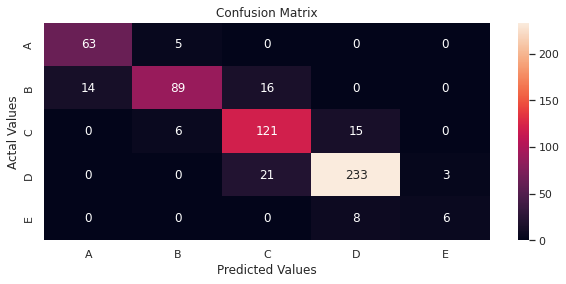

In [46]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_DT, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [105]:
b=print(classification_report(Y_test,dt_pred,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.82      0.93      0.87        68
           B       0.89      0.75      0.81       119
           C       0.77      0.85      0.81       142
           D       0.91      0.91      0.91       257
           E       0.67      0.43      0.52        14

    accuracy                           0.85       600
   macro avg       0.81      0.77      0.78       600
weighted avg       0.86      0.85      0.85       600



In [104]:
acc_DT = dt.score(X_train,Y_train)
acc_DT_T = dt.score(X_test,Y_test)
Accuracy_DT=accuracy_score(Y_test,dt_pred)
dt_pres = precision_score(Y_test,dt_pred,average='weighted')
dt_recall = recall_score(Y_test,dt_pred,average='weighted')
dt_f1 = f1_score(Y_test,dt_pred,average='weighted')
print("Accuarcy of Train:",acc_DT,"\n","Accuarcy of Test:",acc_DT_T,"\n","Precision score:",dt_pres,"\n","Recall score",dt_recall,"\n","F1 SCORE",dt_f1,"\n","ACCURACY SCORE",Accuracy_DT )

Accuarcy of Train: 0.92125 
 Accuarcy of Test: 0.8533333333333334 
 Precision score: 0.8558944811045582 
 Recall score 0.8533333333333334 
 F1 SCORE 0.8518605364758675 
 ACCURACY SCORE 0.8533333333333334


##RANDOM FOREST CLASSIFIER

In [48]:
# Finding the best hyperparameters for random forest

rfc = RandomForestClassifier()

params = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12],
    'min_samples_leaf': [5,10,20,30,40,60,80,100],
    'n_estimators': [10,25,30,35]
}

grid= GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 10,
                           verbose=1, scoring= "accuracy")

# Training the grid
grid.fit(X_train,Y_train)

# Getting the best hyperparameters
best_grid = grid.best_estimator_
best_grid

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25)

In [89]:
RF = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25).fit(X_train,Y_train)

In [90]:
RF_pred=RF.predict(X_test)

In [91]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_rf = confusion_matrix(Y_test, RF_pred)


In [92]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_RF = pd.DataFrame(cm_rf,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])

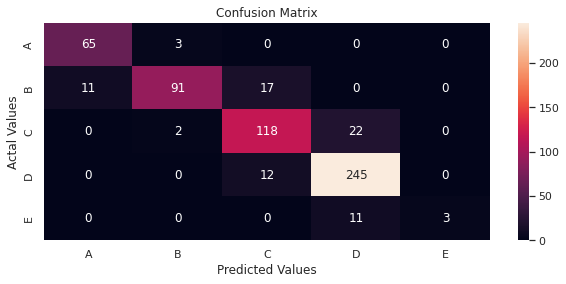

In [93]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_RF, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [106]:
c=print(classification_report(Y_test,RF_pred,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.86      0.96      0.90        68
           B       0.95      0.76      0.85       119
           C       0.80      0.83      0.82       142
           D       0.88      0.95      0.92       257
           E       1.00      0.21      0.35        14

    accuracy                           0.87       600
   macro avg       0.90      0.74      0.77       600
weighted avg       0.88      0.87      0.86       600



In [94]:
acc_RF = RF.score(X_train,Y_train)
acc_RF = RF.score(X_test,Y_test)
Accuracy_RF=accuracy_score(Y_test,RF_pred)
RF_pres = precision_score(Y_test,RF_pred,average='weighted')
RF_recall = recall_score(Y_test,RF_pred,average='weighted')
RF_f1 = f1_score(Y_test,RF_pred,average='weighted')
print("Accuarcy of Train:",acc_RF,"\n","Accuarcy of Test:",acc_RF,"\n","Precision score:",RF_pres,"\n","Recall score",RF_recall,"\n","F1 SCORE",RF_f1,"\n","ACCURACY SCORE",Accuracy_RF )

Accuarcy of Train: 0.87 
 Accuarcy of Test: 0.87 
 Precision score: 0.8757319639723238 
 Recall score 0.87 
 F1 SCORE 0.8640110069319189 
 ACCURACY SCORE 0.87


##NAIVE BAYES 

In [55]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gb=GaussianNB()
grid_NB = GridSearchCV(estimator=gb, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')
grid_NB.fit(X_train, Y_train)
print(grid_NB.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.23101297000831597)


In [56]:
# Fitting Naive Bayes to the Training set  
 
GB =GaussianNB(var_smoothing=0.23101297000831597).fit(X_train, Y_train)

In [57]:
GB_pred=GB.predict(X_test)

In [58]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_gb = confusion_matrix(Y_test, GB_pred)

In [59]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_GB = pd.DataFrame(cm_gb,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])
cm_GB

,A,B,C,D,E
A,63,5,0,0,0
B,5,96,18,0,0
C,0,18,98,26,0
D,0,0,19,238,0
E,0,0,0,5,9


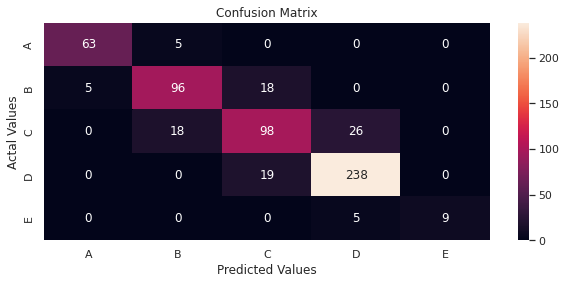

In [60]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_GB, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [107]:
D=print(classification_report(Y_test,GB_pred,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.93      0.93      0.93        68
           B       0.81      0.81      0.81       119
           C       0.73      0.69      0.71       142
           D       0.88      0.93      0.90       257
           E       1.00      0.64      0.78        14

    accuracy                           0.84       600
   macro avg       0.87      0.80      0.83       600
weighted avg       0.84      0.84      0.84       600



In [61]:
acc_GB = GB.score(X_train,Y_train)
acc_GB_T = GB.score(X_test,Y_test)
Accuracy_GB=accuracy_score(Y_test,GB_pred)
GB_pres = precision_score(Y_test,GB_pred,average='weighted')
GB_recall = recall_score(Y_test,GB_pred,average='weighted')
GB_f1 = f1_score(Y_test,GB_pred,average='weighted')
print("Accuarcy of Train:",acc_GB,"\n","Accuarcy of Test:",acc_GB_T,"\n","Precision score:",GB_pres,"\n","Recall score",GB_recall,"\n","F1 SCORE",GB_f1,"\n","ACCURACY SCORE",Accuracy_GB )

Accuarcy of Train: 0.8475 
 Accuarcy of Test: 0.84 
 Precision score: 0.8391073018495572 
 Recall score 0.84 
 F1 SCORE 0.8383389970674708 
 ACCURACY SCORE 0.84


##K-NEARSET NEIGHBOUR

In [62]:
KNN=KNeighborsClassifier()
grid_params1 = {'n_neighbors' : [4,5,7,9,11,13,15]}
gs = GridSearchCV(KNN, grid_params1, verbose = 1, cv=10)
gs.fit(X_train, Y_train)
print(gs.best_estimator_)


Fitting 10 folds for each of 7 candidates, totalling 70 fits
KNeighborsClassifier(n_neighbors=13)


In [63]:
KNN=KNeighborsClassifier(n_neighbors=13).fit(X_train,Y_train)

In [64]:
KNN_pred=KNN.predict(X_test)

In [65]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_knn = confusion_matrix(Y_test, KNN_pred)

In [111]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_KNN = pd.DataFrame(cm_knn,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])
print(cm_KNN)
E=print(classification_report(Y_test,KNN_pred,target_names=["A","B",'C','D','E']))

    A   B    C    D  E
A  63   5    0    0  0
B  13  96   10    0  0
C   0   6  125   11  0
D   0   0    7  250  0
E   0   0    0    8  6
              precision    recall  f1-score   support

           A       0.83      0.93      0.88        68
           B       0.90      0.81      0.85       119
           C       0.88      0.88      0.88       142
           D       0.93      0.97      0.95       257
           E       1.00      0.43      0.60        14

    accuracy                           0.90       600
   macro avg       0.91      0.80      0.83       600
weighted avg       0.90      0.90      0.90       600



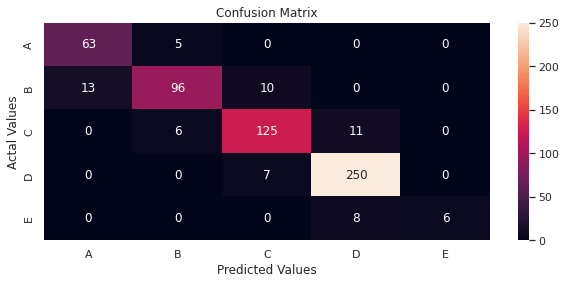

In [67]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_KNN, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [108]:
E=print(classification_report(Y_test,KNN_pred,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.83      0.93      0.88        68
           B       0.90      0.81      0.85       119
           C       0.88      0.88      0.88       142
           D       0.93      0.97      0.95       257
           E       1.00      0.43      0.60        14

    accuracy                           0.90       600
   macro avg       0.91      0.80      0.83       600
weighted avg       0.90      0.90      0.90       600



In [68]:

acc_KNN = RF.score(X_train,Y_train)
acc_KNN = RF.score(X_test,Y_test)
Accuracy_KNN=accuracy_score(Y_test,KNN_pred)
KNN_pres = precision_score(Y_test,KNN_pred,average='weighted')
KNN_recall = recall_score(Y_test,KNN_pred,average='weighted')
KNN_f1 = f1_score(Y_test,KNN_pred,average='weighted')
print("Accuarcy of Train:",acc_KNN,"\n","Accuarcy of Test:",acc_KNN,"\n","Precision score:",KNN_pres,"\n","Recall score",KNN_recall,"\n","F1 SCORE",KNN_f1,"\n","ACCURACY SCORE",Accuracy_KNN )

Accuarcy of Train: 0.885 
 Accuarcy of Test: 0.885 
 Precision score: 0.9016372663932354 
 Recall score 0.9 
 F1 SCORE 0.8971565384658523 
 ACCURACY SCORE 0.9


##ADABOOST CLASSIFIER

In [69]:
 # define the model
ADAC = AdaBoostClassifier().fit(X_train,Y_train)

In [70]:
ADAC_pred=ADAC.predict(X_test)

In [71]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_adac = confusion_matrix(Y_test, ADAC_pred)

In [72]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_ADAC = pd.DataFrame(cm_adac,
                     index = ['A','B','C','D','E'],
                     columns = ['A','B','C','D','E'])
cm_ADAC

,A,B,C,D,E
A,61,7,0,0,0
B,24,61,34,0,0
C,0,3,111,28,0
D,0,0,47,210,0
E,0,0,0,14,0


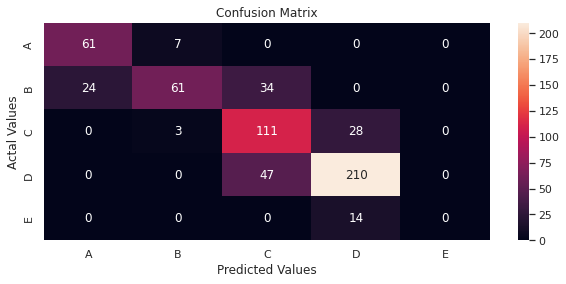

In [73]:
#Plotting the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(cm_ADAC, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [109]:
F=print(classification_report(Y_test,ADAC_pred,target_names=["A","B",'C','D','E']))

              precision    recall  f1-score   support

           A       0.72      0.90      0.80        68
           B       0.86      0.51      0.64       119
           C       0.58      0.78      0.66       142
           D       0.83      0.82      0.83       257
           E       0.00      0.00      0.00        14

    accuracy                           0.74       600
   macro avg       0.60      0.60      0.59       600
weighted avg       0.75      0.74      0.73       600



In [74]:
acc_ADAC = ADAC.score(X_train,Y_train)
acc_ADAC = ADAC.score(X_test,Y_test)
Accuracy_ADAC=accuracy_score(Y_test,ADAC_pred)
ADAC_pres = precision_score(Y_test,ADAC_pred,average='weighted')
ADAC_recall = recall_score(Y_test,ADAC_pred,average='weighted')
ADAC_f1 = f1_score(Y_test,ADAC_pred,average='weighted')
print("Accuarcy of Train:",acc_ADAC,"\n","Accuarcy of Test:",acc_ADAC,"\n","Precision score:",ADAC_pres,"\n","Recall score",ADAC_recall,"\n","F1 SCORE",ADAC_f1,"\n","ACCURACY SCORE",Accuracy_ADAC )

Accuarcy of Train: 0.7383333333333333 
 Accuarcy of Test: 0.7383333333333333 
 Precision score: 0.7454997554773083 
 Recall score 0.7383333333333333 
 F1 SCORE 0.7284647507338292 
 ACCURACY SCORE 0.7383333333333333


##CROSSVALIDATION

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.



In [95]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1 = cross_val_score(logreg,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

F1-Score: 0.914 (0.017)


In [96]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2 = cross_val_score(dt,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

F1-Score: 0.857 (0.024)


In [97]:
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3 = cross_val_score(RF,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

F1-Score: 0.879 (0.021)


In [79]:
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4 = cross_val_score(GB,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')



# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

F1-Score: 0.840 (0.024)


In [80]:
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5 = cross_val_score(KNN,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores5), std(n_scores5)))

F1-Score: 0.891 (0.013)


In [81]:
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores6 = cross_val_score(ADAC,X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores6), std(n_scores6)))


F1-Score: 0.574 (0.055)


In [82]:
# get a stacking ensemble of models
def get_stacking():
  # define the base model
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('ADA', AdaBoostClassifier()))
  level0.append(('bayes', GaussianNB()))
  level0.append(("RFC",RandomForestClassifier()))
	# define meta learner model
  level1 =  LogisticRegression()
  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [83]:
# define the model
model = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores7 = cross_val_score(model, X,Y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores7), std(n_scores7)))

F1-Score: 0.936 (0.014)


In [84]:
model = get_stacking().fit(X_train,Y_train)


In [85]:
stack_pred=model.predict(X_test)

In [86]:
acc_stack = model.score(X_train,Y_train)
acc_stack = model.score(X_test,Y_test)
Accuracy_stack=accuracy_score(Y_test,stack_pred)
stack_pres = precision_score(Y_test,stack_pred,average='weighted')
stack_recall = recall_score(Y_test,stack_pred,average='weighted')
satck_f1 = f1_score(Y_test,stack_pred,average='weighted')
print("Accuarcy of Train:",acc_stack,"\n","Accuarcy of Test:",acc_stack,"\n","Precision score:",stack_pres,"\n","Recall score",stack_recall,"\n","F1 SCORE",satck_f1,"\n","ACCURACY SCORE",Accuracy_stack)

Accuarcy of Train: 0.935 
 Accuarcy of Test: 0.935 
 Precision score: 0.9353639242530869 
 Recall score 0.935 
 F1 SCORE 0.9342240105364491 
 ACCURACY SCORE 0.935


In [88]:
#comparision of metrices
com=[
    ["ACCUARCY SCORE",Accuracy_LR,Accuracy_DT,Accuracy_RF,Accuracy_GB,Accuracy_ADAC,Accuracy_KNN,Accuracy_stack],
    ["PRECISION",Pression_LR,dt_pres,RF_pres,GB_pres,ADAC_pres,KNN_pres,stack_pres],
    ["RECALL SCORE",Recall_LR,dt_recall,RF_recall,GB_recall,KNN_recall,ADAC_recall,stack_pres],
    ["F1_SCORE",F1_LR,dt_f1,RF_f1,GB_f1,KNN_f1,ADAC_f1,stack_pres]
    ]
df=pd.DataFrame(com,columns=[["METRICES","LOGISTIC REGRESSION","DECISION TREE","RANDOM FOREST","GAUSSIAN BAYES","K-NEAREST-NEIGHBOUR","ADABOOST","STACKING"]])
df

,METRICES,LOGISTIC REGRESSION,DECISION TREE,RANDOM FOREST,GAUSSIAN BAYES,K-NEAREST-NEIGHBOUR,ADABOOST,STACKING
0,ACCUARCY SCORE,0.926667,0.926667,0.885000,0.840000,0.738333,0.900000,0.935000
1,PRECISION,0.928730,0.855894,0.889273,0.839107,0.745500,0.901637,0.935364
2,RECALL SCORE,0.926667,0.853333,0.885000,0.840000,0.900000,0.738333,0.935364
3,F1_SCORE,0.919712,0.851861,0.879277,0.838339,0.897157,0.728465,0.935364


**CONCLUSION**


*   Compare to the All models STACKING and LOGISTIC REGRESSION are predicting good accuracy. IN Stacking model having 93% of the ACCURACY SCORE and LOGISTIC REGRESSION having the 92% of the ACCUARCY SCORE 

*   IN STACKING model having 93% of the F1-SCORE and LOGISTIC REGRESSION having the 91% of the F1-SCORE 
*   From the analysis STACKING is the best model for the house sale data 

